In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:,.0f}'.format)

In [2]:
df = pd.read_csv('/content/pakistan_house_price_data.csv')
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,1,346905,3236,https://www.zameen.com/Property/e_11_2_services_society_flat_available_for_sale-346905-3236-1.html,Flat,6900000,E-11,Islamabad,Islamabad Capital,34,73,3,For Sale,3,5/4/2019,NaN,NaN,"15,246"
1,2,386513,764,https://www.zameen.com/Property/islamabad_g_15_house_is_available_for_sale-386513-764-1.html,House,16500000,G-15,Islamabad,Islamabad Capital,34,73,6,For Sale,5,7/17/2019,NaN,NaN,"2,178"
2,3,656161,340,https://www.zameen.com/Property/islamabad_bani_gala_a_rare_minimalist_concept_in_a_quiet_location-656161-340-1.html,House,43500000,Bani Gala,Islamabad,Islamabad Capital,34,73,4,For Sale,4,4/5/2019,NaN,NaN,"10,890"
3,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha_homes_islamabad_dha_valley_8_marla_home_for_sale-841645-3226-1.html,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33,73,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,"2,178"
4,5,850762,3390,https://www.zameen.com/Property/ghauri_town_ghauri_town_phase_1_house_is_available_for_sale_in_ghauri_town_phase_1-850762-3390-1.html,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,34,73,8,For Sale,8,4/5/2019,NaN,NaN,"87,120"


Since my job is to just do linear regression on this dataset, i will try to minimize the unwanted columns which arent necessary

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

columns like property_id,location_id, page_url etc are not needed. so i am dropping them as well

In [4]:
df.drop(['property_id','location_id','page_url','latitude','longitude','date_added','agency','agent'],axis=1,inplace=True)

In [5]:
df.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
0,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,"15,246"
1,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,"2,178"
2,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,"10,890"
3,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,"2,178"
4,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,8,For Sale,8,"87,120"


In [6]:
df.tail()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
27885,House,700000,F-7,Islamabad,Islamabad Capital,9,For Rent,8,"10,890"
27886,Upper Portion,115000,I-8,Islamabad,Islamabad Capital,3,For Rent,4,"5,445"
27887,Lower Portion,45000,PWD Housing Scheme,Islamabad,Islamabad Capital,3,For Rent,3,"3,267"
27888,House,400000,F-7,Islamabad,Islamabad Capital,6,For Rent,5,"70,785"
27889,House,100000,E-11,Islamabad,Islamabad Capital,7,For Rent,5,"174,240"


In [7]:
df[df['city']!='Islamabad']
# so this tells us that the entire dataset is based on islamabad property, so im dropping city and province name as well

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area


In [8]:
df.drop(['city','province_name'],axis=1,inplace=True)
df

,property_type,price,location,baths,purpose,bedrooms,Total_Area
0,Flat,6900000,E-11,3,For Sale,3,"15,246"
1,House,16500000,G-15,6,For Sale,5,"2,178"
2,House,43500000,Bani Gala,4,For Sale,4,"10,890"
3,House,7000000,DHA Defence,3,For Sale,3,"2,178"
4,House,34500000,Ghauri Town,8,For Sale,8,"87,120"
...,...,...,...,...,...,...,...
27885,House,700000,F-7,9,For Rent,8,"10,890"
27886,Upper Portion,115000,I-8,3,For Rent,4,"5,445"
27887,Lower Portion,45000,PWD Housing Scheme,3,For Rent,3,"3,267"
27888,House,400000,F-7,6,For Rent,5,"70,785"


since there are 2 types here, for sale and for rent, so i will divide this data set into 2 different datasets and then predict selling price for 'for sale' ones, and rent price for 'for rent' ones

In [9]:
df_sale = df[df['purpose'] == 'For Sale']
df_rent = df[df['purpose'] == 'For Rent']
df_sale.drop('purpose',axis=1,inplace=True)
df_rent.drop('purpose',axis=1,inplace=True)

/tmp/ipython-input-1153550197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale.drop('purpose',axis=1,inplace=True)
/tmp/ipython-input-1153550197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent.drop('purpose',axis=1,inplace=True)


In [10]:
df_sale.rename(columns={'price': 'selling price'}, inplace=True)
df_rent.rename(columns={'price': 'rent price'}, inplace=True)
df_sale, df_rent

/tmp/ipython-input-1813875542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale.rename(columns={'price': 'selling price'}, inplace=True)
/tmp/ipython-input-1813875542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent.rename(columns={'price': 'rent price'}, inplace=True)


(      property_type  selling price     location  baths  bedrooms  Total_Area
 0              Flat        6900000         E-11      3         3      15,246
 1             House       16500000         G-15      6         5       2,178
 2             House       43500000    Bani Gala      4         4      10,890
 3             House        7000000  DHA Defence      3         3       2,178
 4             House       34500000  Ghauri Town      8         8      87,120
 ...             ...            ...          ...    ...       ...         ...
 27853          Flat       20000000         G-15      4         4       4,356
 27854         House         100000         D-12      6         6      38,660
 27855          Flat       32500000         G-11      2         3      19,330
 27856          Flat        5000000         G-15      1         1       7,623
 27857          Flat        8200000         G-15      2         2      15,246
 
 [12320 rows x 6 columns],
        property_type  rent price  

since linear regression requires all inputs to be numeric, i will only make predictions on "HOUSE" and remove the others.

In [11]:
# Keep only rows where property_type is 'House'
df_sale = df_sale[df_sale['property_type'] == 'House']
df_rent = df_rent[df_rent['property_type'] == 'House']

In [12]:
df_sale, df_rent

(      property_type  selling price     location  baths  bedrooms  Total_Area
 1             House       16500000         G-15      6         5       2,178
 2             House       43500000    Bani Gala      4         4      10,890
 3             House        7000000  DHA Defence      3         3       2,178
 4             House       34500000  Ghauri Town      8         8      87,120
 5             House       27000000  Korang Town      8         8       5,445
 ...             ...            ...          ...    ...       ...         ...
 27848         House       12700000  Soan Garden      3         3       2,723
 27849         House       27000000         G-13      4         4       1,906
 27850         House        9000000  Soan Garden      3         2       1,634
 27851         House       14000000          F-7      7         7       5,445
 27854         House         100000         D-12      6         6      38,660
 
 [9220 rows x 6 columns],
       property_type  rent price    

Since location is also a text, i will use a groupby encoding function to calculate the average mean value o fthat place which my model can take as input

In [13]:
location_price_mean = df_sale.groupby('location')['selling price'].mean()
df_sale['location_mean'] = df_sale['location'].map(location_price_mean)
df_sale
location_rent_mean = df_rent.groupby('location')['rent price'].mean()
df_rent['location_mean'] = df_rent['location'].map(location_rent_mean)
df_rent

/tmp/ipython-input-237219517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale['location_mean'] = df_sale['location'].map(location_price_mean)
/tmp/ipython-input-237219517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent['location_mean'] = df_rent['location'].map(location_rent_mean)


,property_type,rent price,location,baths,bedrooms,Total_Area,location_mean
32,House,110000,DHA Defence,5,5,"5,445","87,439"
33,House,600000,F-7,6,6,"10,890","473,622"
35,House,45000,Pakistan Town,5,3,"65,340","39,037"
37,House,175000,F-7,4,4,"36,209","473,622"
39,House,1022000,F-6,8,8,"10,890","537,424"
...,...,...,...,...,...,...,...
27883,House,1000000,F-7,10,10,"70,785","473,622"
27884,House,55000,PWD Housing Scheme,6,5,"2,723","57,952"
27885,House,700000,F-7,9,8,"10,890","473,622"
27888,House,400000,F-7,6,5,"70,785","473,622"


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

First I will do for Houses for Sale

In [15]:
x1 = df_sale[['baths', 'bedrooms', 'Total_Area', 'location_mean']]
y1 = df_sale['selling price']

In [16]:
x1_train,x1_test,  y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=20)

In [17]:
lr = LinearRegression()
lr.fit(x1_train,y1_train)

LinearRegression()

In [18]:
y1_pred =lr.predict(x1_test)

In [19]:
print(f"R² Score: {r2_score(y1_test,y1_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y1_test,y1_pred)}")

R² Score: 0.6857682534175557
Mean Absolute Error: 13143271.253671193


68% r2 score with an average error of 1.3 crore. it is very off

In [20]:
results =pd.DataFrame({'Actual Price':y1_test,'Predicted Price':y1_pred})
results.head(20)

,Actual Price,Predicted Price
1879,35000000,"42,743,874"
3212,26000000,"19,996,909"
10588,40000000,"42,111,703"
14522,4500000,"1,795,150"
4627,87500000,"86,641,136"
14771,13500000,"13,453,996"
14604,24500000,"42,278,831"
3859,3500000,"7,230,975"
14967,112500000,"156,754,773"
20113,260000000,"147,872,747"


Text(0.5, 1.0, 'Actual vs Predicted Prices')

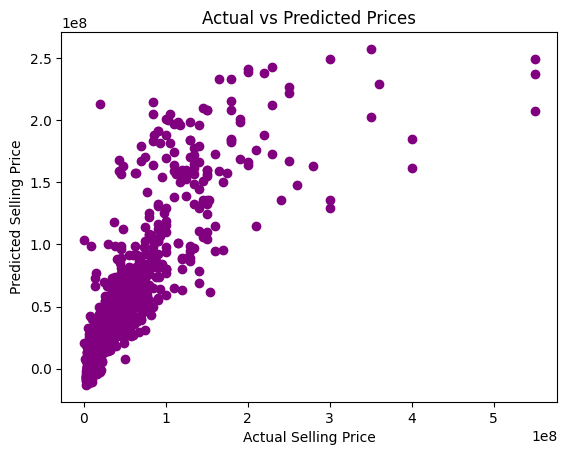

In [21]:
# making a graph to see if my prediction is accurate enough or not
plt.scatter(y1_test, y1_pred, color='purple')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Prices')

well the graoh isnt very accurate

now lets do it for rent

In [22]:
x2 = df_rent[['baths', 'bedrooms', 'Total_Area', 'location_mean']]
y2 = df_rent['rent price']

In [23]:
x2_train,x2_test,y2_train, y2_test = train_test_split(x2,y2,test_size=0.2,random_state=20)

In [24]:
lr.fit(x2_train,y2_train)

LinearRegression()

In [25]:
y2_pred = lr.predict(x2_test)

In [26]:
print(f"R² Score: {r2_score(y2_test,y2_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y2_test,y2_pred)}")

R² Score: 0.465465603845999
Mean Absolute Error: 95502.63769960208


well r2 score is less than 50% and an average error of 1 lakh in my prediction...

In [27]:
results =pd.DataFrame({'Actual Rent':y2_test,'Predicted Rent':y2_pred})
results.head(20)

,Actual Rent,Predicted Rent
10276,300000,"390,842"
23296,46000,-462
1510,300000,"462,784"
21635,130000,"149,244"
20157,200000,"463,076"
23561,200000,"267,392"
8087,135000,"174,276"
20398,78000,"49,633"
14323,400000,"575,098"
3996,38000,"84,998"


Text(0.5, 1.0, 'Actual vs Predicted Prices')

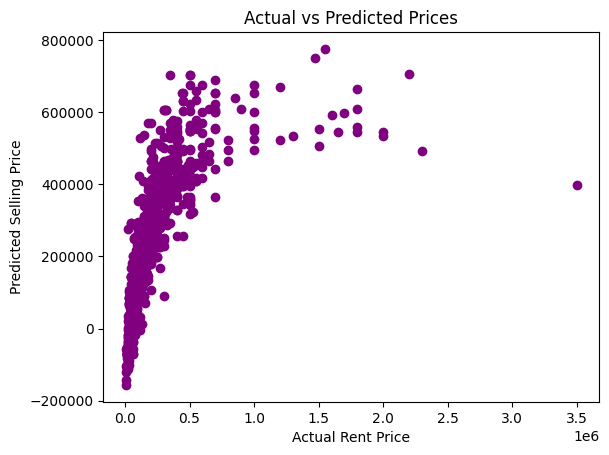

In [28]:
# making a graph to see if my prediction is accurate enough or not
plt.scatter(y2_test, y2_pred, color='purple')
plt.xlabel('Actual Rent Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Prices')

not very good